In [1]:
#Import Libraries
import csv
import numpy as np
import pandas as pd

### Import Descision Tree Classifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Perform the necessary imports
import matplotlib.pyplot as plt
## for pearsonr correlation just feed x and y to this
from scipy.stats import pearsonr
pd.options.display.max_columns=60
#Change the Number Fromat of DATA frame
pd.options.display.float_format = '{:,.4f}'.format

In [2]:
### Load the Data
seed=40
SEED=40
path="C:\\Users\\fbaharkoush\\IE 598 Machine Learning\\Homework\\Group Project\\"
df_Eco=pd.read_csv(path+"MLF_GP2_EconCycle.csv").drop("Date",axis=1)
if df_Eco.isnull().sum().sum()==0:
    print("No Missing Values in the dataset")

No Missing Values in the dataset


In [3]:
df_Eco.describe()

,T1Y Index,T2Y Index,T3Y Index,T5Y Index,T7Y Index,T10Y Index,CP1M,CP3M,CP6M,CP1M_T1Y,CP3M_T1Y,CP6M_T1Y,USPHCI,PCT 3MO FWD,PCT 6MO FWD,PCT 9MO FWD
count,223.0000,223.0000,223.0000,223.0000,223.0000,223.0000,223.0000,223.0000,223.0000,223.0000,223.0000,223.0000,223.0000,223.0000,223.0000,223.0000
mean,8.0307,8.4107,8.5636,8.8087,8.9798,9.0735,7.9422,7.9369,7.8928,0.9818,0.9835,0.9827,60.5947,0.0071,0.0141,0.0211
std,3.1586,2.9544,2.8204,2.6477,2.5427,2.4475,3.4051,3.3294,3.1814,0.0862,0.0772,0.0672,9.5124,0.0048,0.0091,0.0130
min,3.1800,3.8400,4.1700,4.7100,5.0500,5.3300,3.1100,3.1400,3.1900,0.7175,0.7135,0.6985,47.0800,-0.0068,-0.0098,-0.0123
25%,5.7350,6.1800,6.4100,6.6950,6.9650,7.1750,5.6050,5.6450,5.6350,0.9338,0.9397,0.9454,50.3700,0.0055,0.0107,0.0144
50%,7.6700,8.0000,8.1300,8.3300,8.5200,8.6100,7.7300,7.7200,7.6200,0.9727,0.9779,0.9800,61.0900,0.0083,0.0162,0.0244
75%,9.8400,10.0750,10.3750,10.5250,10.6400,10.6850,9.3450,9.3450,9.3000,1.0330,1.0261,1.0160,67.0050,0.0102,0.0199,0.0294
max,16.7200,16.4600,16.2200,15.9300,15.6500,15.3200,18.9500,18.0700,16.6600,1.3392,1.2770,1.2205,79.2100,0.0203,0.0366,0.0502


In [4]:
df_Eco.head(1)

,T1Y Index,T2Y Index,T3Y Index,T5Y Index,T7Y Index,T10Y Index,CP1M,CP3M,CP6M,CP1M_T1Y,CP3M_T1Y,CP6M_T1Y,USPHCI,PCT 3MO FWD,PCT 6MO FWD,PCT 9MO FWD
0,10.4100,9.8600,9.5000,9.2000,9.1400,9.1000,9.7500,9.9500,10.0100,0.9366,0.9558,0.9616,47.0800,0.0115,0.0181,0.0244


In [5]:
traget_variables=['USPHCI', 'PCT 3MO FWD', 'PCT 6MO FWD', 'PCT 9MO FWD']
X_features=list(df_Eco.drop(traget_variables,axis=1).columns)

In [6]:
X=scale(df_Eco[X_features].values)

### PCA

In [7]:
# Create PCA instance: model
pca_model = PCA()
### Fit the Features value to PCA
pca_model.fit_transform(X)

array([[ 1.11214451e+00,  6.17581349e-01, -4.41063547e-01, ...,
         1.34097620e-02, -9.99721397e-03,  2.28652184e-03],
       [ 1.06203268e+00,  3.41115562e-01, -3.92792807e-01, ...,
        -6.70512415e-03, -1.91876227e-03,  6.22659904e-03],
       [ 1.06821108e+00,  4.97441887e-01, -4.55770468e-01, ...,
        -7.21509588e-03,  8.06870412e-04,  5.13546008e-03],
       ...,
       [-2.35968182e+00,  9.69941838e-02, -2.47184098e-01, ...,
        -3.81553651e-03,  3.87635866e-03,  6.92349229e-04],
       [-2.47206142e+00, -3.28048208e-01, -2.50716222e-01, ...,
        -5.40530754e-03,  2.34832833e-03, -5.93912041e-04],
       [-2.57943927e+00, -9.21334922e-01, -1.90554111e-01, ...,
        -1.08503357e-02,  1.86035254e-03, -1.59232533e-03]])

In [8]:
df_pca_exp_var=pd.DataFrame({"Features":X_features,
              "PCA_Exp_Var":pca_model.explained_variance_ratio_}).sort_values("PCA_Exp_Var",ascending=False)
df_pca_exp_var["Cummulative Exp Var"]=df_pca_exp_var["PCA_Exp_Var"].cumsum()
df_pca_exp_var.head()

,Features,PCA_Exp_Var,Cummulative Exp Var
0,T1Y Index,0.7250,0.7250
1,T2Y Index,0.2505,0.9755
2,T3Y Index,0.0145,0.9899
3,T5Y Index,0.0085,0.9984
4,T7Y Index,0.0007,0.9991


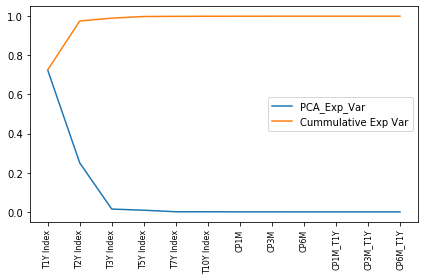

In [9]:
plotX = df_pca_exp_var.iloc[:, 0]
plotY1 = df_pca_exp_var.iloc[:, 1]
plotY2 = df_pca_exp_var.iloc[:, 2]
plt.xticks(rotation=90)
plt.plot(plotX, plotY1)
plt.plot(plotX, plotY2)
plt.legend(['PCA_Exp_Var', 'Cummulative Exp Var'])
plt.tick_params(axis='x', which='major', labelsize=8)
plt.tight_layout()

The PCA shows 99% of the data is captured through the first 4 features.

In [10]:
### Selecting Features thats explaince 99% of the data accroding to PCA
X_features_pca=list(df_pca_exp_var[df_pca_exp_var["Cummulative Exp Var"]<=.999]["Features"])
X_pca=scale(df_Eco[X_features_pca].values)

In [13]:
print("List of Principle Components",X_features_pca)

List of Principle Components ['T1Y Index', 'T2Y Index', 'T3Y Index', 'T5Y Index']


### 1. Linear Regression

In [11]:
lr_model=LinearRegression()

In [12]:
list_of_r_square_train=[]
list_of_r_square_test=[]
for y_variable in traget_variables:
    y=scale(df_Eco[y_variable].values)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=SEED)
    lr_model.fit(X_train,y_train)
    list_of_r_square_train.append(lr_model.score(X_train, y_train))
    list_of_r_square_test.append(lr_model.score(X_test, y_test))

In [14]:
df_linear_reg_summarry=pd.DataFrame({"Target Varibale":traget_variables,
              "R Score Train":list_of_r_square_train,
             "R Score Test":list_of_r_square_test})
df_linear_reg_summarry["PCA"]=False
df_linear_reg_summarry['Model']='Linear Regression'
df_linear_reg_summarry

,Target Varibale,R Score Train,R Score Test,PCA,Model
0,USPHCI,0.8274,0.7349,False,Linear Regression
1,PCT 3MO FWD,0.2913,0.0413,False,Linear Regression
2,PCT 6MO FWD,0.3330,0.1293,False,Linear Regression
3,PCT 9MO FWD,0.4048,0.1827,False,Linear Regression


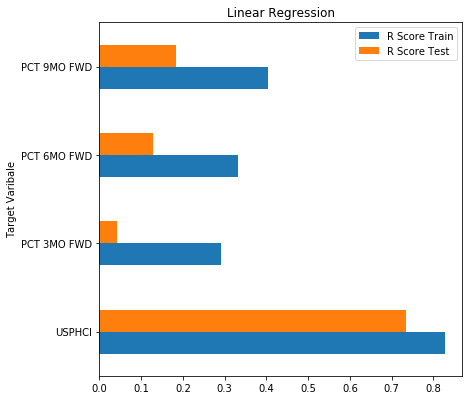

In [15]:
df_linear_reg_summarry.plot("Target Varibale",kind='barh',figsize=(6.5,6.5),title="Linear Regression")

### 1.1 Linear Regression

In [16]:
del X_train,X_test,y_train,y_test , lr_model

In [17]:
lr_model=LinearRegression()

In [18]:
list_of_r_square_train=[]
list_of_r_square_test=[]
for y_variable in traget_variables:
    y=scale(df_Eco[y_variable].values)
    X_train,X_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.25,random_state=212)
    lr_model.fit(X_train,y_train)
    list_of_r_square_train.append(lr_model.score(X_train, y_train))
    list_of_r_square_test.append(lr_model.score(X_test, y_test))

In [21]:
df_linear_reg_summary_pca=pd.DataFrame({"Target Varibale":traget_variables,
              "R Score Train":list_of_r_square_train,
             "R Score Test":list_of_r_square_test})
df_linear_reg_summary_pca["PCA"]=True
df_linear_reg_summary_pca["Model"]="Linear Regression"
df_linear_reg_summary_pca

,Target Varibale,R Score Train,R Score Test,PCA,Model
0,USPHCI,0.7093,0.7157,True,Linear Regression
1,PCT 3MO FWD,0.2246,0.1112,True,Linear Regression
2,PCT 6MO FWD,0.2875,0.2069,True,Linear Regression
3,PCT 9MO FWD,0.3521,0.3059,True,Linear Regression


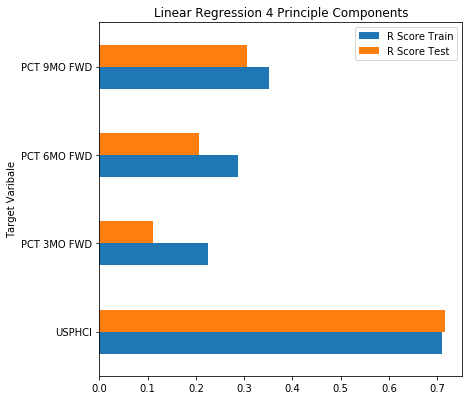

In [22]:
df_linear_reg_summary_pca.plot("Target Varibale",kind='barh',figsize=(6.5,6.5),
                               title="Linear Regression 4 Principle Components")

### 2.  Fitting SVR

In [23]:
del X_train,X_test,y_train,y_test

In [24]:
### Instantiate a random forests regressor 'rf'
svr_model = SVR(gamma='auto')
### Parameter
params_svr = {
'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
'degree': [1,2,3,4, 6, 8],
'C': [1,2,3,4,5]}

In [25]:
list_of_r_square_train=[]
list_of_r_square_test=[]
list_of_r_best_param=[]
list_of_grid_sarch_best_score=[]
list_of_svr_best_estimator=[]
for y_variable in traget_variables:
    y=scale(df_Eco[y_variable].values)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=seed)
    svr_grid_search=GridSearchCV(estimator=svr_model,
                 param_grid=params_svr,iid=False,
                 cv=10,
                 scoring='r2',
                 verbose=1,
                 n_jobs=-1)
    svr_grid_search.fit(X_train, y_train)
    list_of_r_square_train.append(svr_grid_search.score(X_train, y_train))
    list_of_r_square_test.append(svr_grid_search.score(X_test, y_test))
    list_of_grid_sarch_best_score.append(svr_grid_search.best_score_)
    list_of_svr_best_estimator.append(svr_grid_search.best_estimator_)
    list_of_r_best_param.append(svr_grid_search.best_params_)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:    3.9s finished


In [27]:
df_svr_summary=pd.DataFrame({"Target Varibale":traget_variables,
              "R Score Train":list_of_r_square_train,
             "R Score Test":list_of_r_square_test,
             "Grid Search Best Score":list_of_grid_sarch_best_score,
             "Best Estimator":list_of_svr_best_estimator,
             "Best Parameters":list_of_r_best_param})
df_svr_summary["PCA"]=False
df_svr_summary["Model"]="SVR"
df_svr_summary

,Target Varibale,R Score Train,R Score Test,Grid Search Best Score,Best Estimator,Best Parameters,PCA,Model
0,USPHCI,0.8861,0.8333,0.8193,"SVR(C=5, cache_size=200, coef0=0.0, degree=1, ...","{'C': 5, 'degree': 1, 'kernel': 'rbf'}",False,SVR
1,PCT 3MO FWD,0.5703,0.4249,0.3425,"SVR(C=2, cache_size=200, coef0=0.0, degree=1, ...","{'C': 2, 'degree': 1, 'kernel': 'rbf'}",False,SVR
2,PCT 6MO FWD,0.6293,0.5779,0.4128,"SVR(C=3, cache_size=200, coef0=0.0, degree=1, ...","{'C': 3, 'degree': 1, 'kernel': 'rbf'}",False,SVR
3,PCT 9MO FWD,0.6634,0.6391,0.5191,"SVR(C=3, cache_size=200, coef0=0.0, degree=1, ...","{'C': 3, 'degree': 1, 'kernel': 'rbf'}",False,SVR


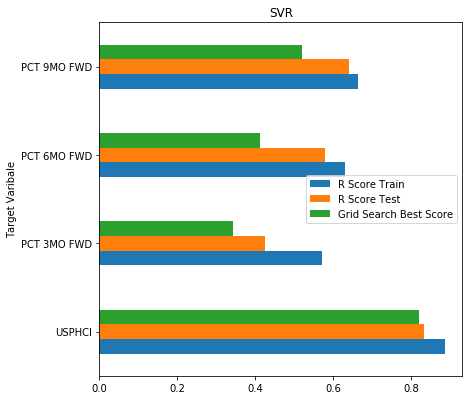

In [28]:
df_svr_summary.plot("Target Varibale",kind='barh',figsize=(6.5,6.5),title="SVR")

### 2.1 SVR with 4 Principle Components  Explananing 99% of Variance 

In [29]:
del X_train,X_test,y_train,y_test, svr_model , svr_grid_search

In [30]:
### Instantiate a random forests regressor 'rf'
svr_model = SVR(gamma='auto')
### Parameter
params_svr = {
'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
'degree': [1,2,3,4, 6, 8],
'C': [1,2,3,4,5]}

In [31]:
list_of_r_square_train=[]
list_of_r_square_test=[]
list_of_r_best_param=[]
list_of_grid_sarch_best_score=[]
list_of_svr_best_estimator=[]
for y_variable in traget_variables:
    y=scale(df_Eco[y_variable].values)
    X_train,X_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.25,random_state=seed)
    svr_grid_search=GridSearchCV(estimator=svr_model,
                 param_grid=params_svr,iid=False,
                 cv=10,
                 scoring='r2',
                 verbose=1,
                 n_jobs=-1)
    svr_grid_search.fit(X_train, y_train)
    list_of_r_square_train.append(svr_grid_search.score(X_train, y_train))
    list_of_r_square_test.append(svr_grid_search.score(X_test, y_test))
    list_of_grid_sarch_best_score.append(svr_grid_search.best_score_)
    list_of_svr_best_estimator.append(svr_grid_search.best_estimator_)
    list_of_r_best_param.append(svr_grid_search.best_params_)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  1.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  2.1min finished


In [34]:
df_svr_summary_pca=pd.DataFrame({"Target Varibale":traget_variables,
              "R Score Train":list_of_r_square_train,
             "R Score Test":list_of_r_square_test,
             "Grid Search Best Score":list_of_grid_sarch_best_score,
             "Best Estimator":list_of_svr_best_estimator,
             "Best Parameters":list_of_r_best_param})
df_svr_summary_pca["PCA"]=True
df_svr_summary_pca["Model"]="SVR"
df_svr_summary_pca

,Target Varibale,R Score Train,R Score Test,Grid Search Best Score,Best Estimator,Best Parameters,PCA,Model
0,USPHCI,0.7779,0.7525,0.7244,"SVR(C=4, cache_size=200, coef0=0.0, degree=1, ...","{'C': 4, 'degree': 1, 'kernel': 'rbf'}",True,SVR
1,PCT 3MO FWD,0.4316,0.2722,0.2216,"SVR(C=2, cache_size=200, coef0=0.0, degree=1, ...","{'C': 2, 'degree': 1, 'kernel': 'rbf'}",True,SVR
2,PCT 6MO FWD,0.5150,0.4544,0.3109,"SVR(C=5, cache_size=200, coef0=0.0, degree=1, ...","{'C': 5, 'degree': 1, 'kernel': 'rbf'}",True,SVR
3,PCT 9MO FWD,0.5351,0.5345,0.4164,"SVR(C=5, cache_size=200, coef0=0.0, degree=1, ...","{'C': 5, 'degree': 1, 'kernel': 'rbf'}",True,SVR


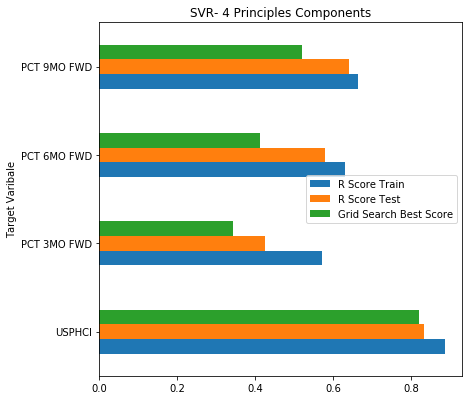

In [35]:
df_svr_summary.plot("Target Varibale",kind='barh',figsize=(6.5,6.5),title="SVR- 4 Principles Components")

### 3. KNeighborsRegressor

In [36]:
### Instantiate a random forests regressor 'rf'
knn_model = KNeighborsRegressor()
### Parameter
params_kkn = {
'n_neighbors': list(range(1, 100)),
'p': [1,2]}

In [37]:
list_of_r_square_train=[]
list_of_r_square_test=[]
list_of_r_best_param=[]
list_of_grid_sarch_best_score=[]
list_of_svr_best_estimator=[]
for y_variable in traget_variables:
    y=scale(df_Eco[y_variable].values)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=seed)
    knn_grid_search=GridSearchCV(estimator=knn_model,
                 param_grid=params_kkn,
                                 iid=False,
                                 cv=10,
                                 scoring='r2',
                                 n_jobs=-1,
                                 verbose=1)
    knn_grid_search.fit(X_train, y_train)
    list_of_r_square_train.append(knn_grid_search.score(X_train, y_train))
    list_of_r_square_test.append(knn_grid_search.score(X_test, y_test))
    list_of_grid_sarch_best_score.append(knn_grid_search.best_score_)
    list_of_svr_best_estimator.append(knn_grid_search.best_estimator_)
    list_of_r_best_param.append(knn_grid_search.best_params_)

Fitting 10 folds for each of 198 candidates, totalling 1980 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1980 out of 1980 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 198 candidates, totalling 1980 fits


[Parallel(n_jobs=-1)]: Done 1980 out of 1980 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 198 candidates, totalling 1980 fits


[Parallel(n_jobs=-1)]: Done 1980 out of 1980 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 198 candidates, totalling 1980 fits


[Parallel(n_jobs=-1)]: Done 1980 out of 1980 | elapsed:    0.7s finished


In [38]:
df_knn_summary=pd.DataFrame({"Target Varibale":traget_variables,
              "R Score Train":list_of_r_square_train,
             "R Score Test":list_of_r_square_test,
             "Grid Search Best Score":list_of_grid_sarch_best_score,
             "Best Estimator":list_of_svr_best_estimator,
             "Best Parameters":list_of_r_best_param})
df_knn_summary["PCA"]=False
df_knn_summary["Model"]="KNN Regressor"
df_knn_summary

,Target Varibale,R Score Train,R Score Test,Grid Search Best Score,Best Estimator,Best Parameters,PCA,Model
0,USPHCI,0.9366,0.8777,0.8468,"KNeighborsRegressor(algorithm='auto', leaf_siz...","{'n_neighbors': 3, 'p': 2}",False,KNN Regressor
1,PCT 3MO FWD,0.4772,0.3656,0.2371,"KNeighborsRegressor(algorithm='auto', leaf_siz...","{'n_neighbors': 10, 'p': 2}",False,KNN Regressor
2,PCT 6MO FWD,0.6178,0.6021,0.2792,"KNeighborsRegressor(algorithm='auto', leaf_siz...","{'n_neighbors': 6, 'p': 1}",False,KNN Regressor
3,PCT 9MO FWD,0.6900,0.6978,0.4228,"KNeighborsRegressor(algorithm='auto', leaf_siz...","{'n_neighbors': 6, 'p': 1}",False,KNN Regressor


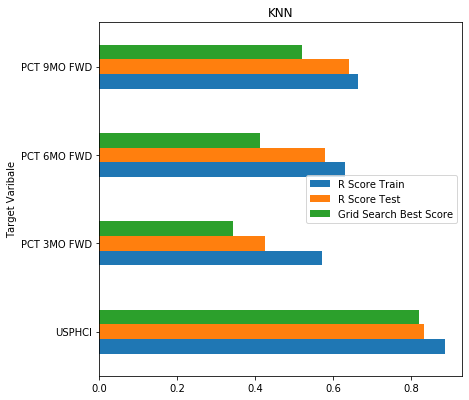

In [39]:
df_svr_summary.plot("Target Varibale",kind='barh',figsize=(6.5,6.5),title="KNN")

### 3.1 KNeighborsRegressor with 4 Principle Components  Explananing 99% of Variance 

In [40]:
del X_train,X_test,y_train,y_test, svr_model , svr_grid_search

In [41]:
### Instantiate a random forests regressor 'rf'
knn_model = KNeighborsRegressor()
### Parameter
params_kkn = {
'n_neighbors': list(range(1, 100)),
'p': [1,2]}

In [42]:
list_of_r_square_train=[]
list_of_r_square_test=[]
list_of_r_best_param=[]
list_of_grid_sarch_best_score=[]
list_of_svr_best_estimator=[]
for y_variable in traget_variables:
    y=scale(df_Eco[y_variable].values)
    X_train,X_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.25,random_state=seed)
    knn_grid_search=GridSearchCV(estimator=knn_model,
                 param_grid=params_kkn,
                                 iid=False,
                                 cv=10,
                                 scoring='r2',
                                 n_jobs=-1,
                                 verbose=1)
    knn_grid_search.fit(X_train, y_train)
    list_of_r_square_train.append(knn_grid_search.score(X_train, y_train))
    list_of_r_square_test.append(knn_grid_search.score(X_test, y_test))
    list_of_grid_sarch_best_score.append(knn_grid_search.best_score_)
    list_of_svr_best_estimator.append(knn_grid_search.best_estimator_)
    list_of_r_best_param.append(knn_grid_search.best_params_)

Fitting 10 folds for each of 198 candidates, totalling 1980 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1980 out of 1980 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 198 candidates, totalling 1980 fits


[Parallel(n_jobs=-1)]: Done 1980 out of 1980 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 198 candidates, totalling 1980 fits


[Parallel(n_jobs=-1)]: Done 1980 out of 1980 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 198 candidates, totalling 1980 fits


[Parallel(n_jobs=-1)]: Done 1980 out of 1980 | elapsed:    0.7s finished


In [43]:
df_knn_summary_pca=pd.DataFrame({"Target Varibale":traget_variables,
              "R Score Train":list_of_r_square_train,
             "R Score Test":list_of_r_square_test,
             "Grid Search Best Score":list_of_grid_sarch_best_score,
             "Best Estimator":list_of_svr_best_estimator,
             "Best Parameters":list_of_r_best_param})
df_knn_summary_pca["PCA"]=True
df_knn_summary_pca["Model"]="KNN Regressor"
df_knn_summary_pca

,Target Varibale,R Score Train,R Score Test,Grid Search Best Score,Best Estimator,Best Parameters,PCA,Model
0,USPHCI,0.8381,0.8210,0.7690,"KNeighborsRegressor(algorithm='auto', leaf_siz...","{'n_neighbors': 7, 'p': 2}",True,KNN Regressor
1,PCT 3MO FWD,0.4665,0.2668,0.2189,"KNeighborsRegressor(algorithm='auto', leaf_siz...","{'n_neighbors': 11, 'p': 2}",True,KNN Regressor
2,PCT 6MO FWD,0.6309,0.5364,0.2869,"KNeighborsRegressor(algorithm='auto', leaf_siz...","{'n_neighbors': 6, 'p': 1}",True,KNN Regressor
3,PCT 9MO FWD,0.6696,0.6265,0.3893,"KNeighborsRegressor(algorithm='auto', leaf_siz...","{'n_neighbors': 6, 'p': 1}",True,KNN Regressor


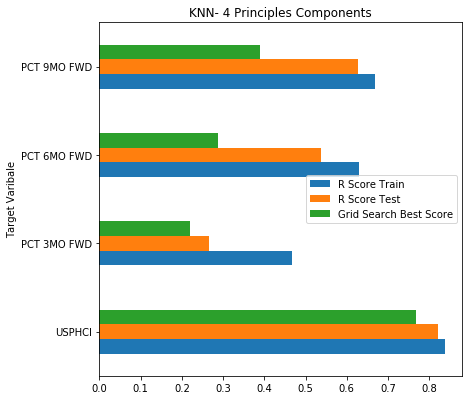

In [44]:
df_knn_summary_pca.plot("Target Varibale",kind='barh',figsize=(6.5,6.5),title="KNN- 4 Principles Components")

### Random Forest Regressor

In [45]:
del X_train,X_test,y_train,y_test

In [46]:
rf_model = RandomForestRegressor(random_state= SEED)
params_rf = {
'n_estimators': [100,200,300,400],
'max_depth': [1,2,3,4,5,6],
'min_samples_leaf': [0.1,.12,.15, 0.2],
'max_features': ['log2','sqrt']}

In [47]:
list_of_r_square_train=[]
list_of_r_square_test=[]
list_of_r_best_param=[]
list_of_grid_sarch_best_score=[]
list_of_svr_best_estimator=[]
for y_variable in traget_variables:
    y=scale(df_Eco[y_variable].values)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=seed)
    rf_grid_search=GridSearchCV(estimator=rf_model,
                 param_grid=params_rf,
                                 iid=False,
                                 cv=10,
                                 scoring='r2',
                                 n_jobs=-1,
                                 verbose=1)
    rf_grid_search.fit(X_train, y_train)
    list_of_r_square_train.append(rf_grid_search.score(X_train, y_train))
    list_of_r_square_test.append(rf_grid_search.score(X_test, y_test))
    list_of_grid_sarch_best_score.append(rf_grid_search.best_score_)
    list_of_svr_best_estimator.append(rf_grid_search.best_estimator_)
    list_of_r_best_param.append(rf_grid_search.best_params_)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 1744 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 1514 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  1.2min finished


Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 1112 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Done 236 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 836 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 1836 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  1.1min finished


In [48]:
df_rf_summary=pd.DataFrame({"Target Varibale":traget_variables,
              "R Score Train":list_of_r_square_train,
             "R Score Test":list_of_r_square_test,
             "Grid Search Best Score":list_of_grid_sarch_best_score,
             "Best Estimator":list_of_svr_best_estimator,
             "Best Parameters":list_of_r_best_param})
df_rf_summary["PCA"]=False
df_rf_summary["Model"]="Random Forest"
df_rf_summary

,Target Varibale,R Score Train,R Score Test,Grid Search Best Score,Best Estimator,Best Parameters,PCA,Model
0,USPHCI,0.8258,0.7831,0.7472,"(DecisionTreeRegressor(criterion='mse', max_de...","{'max_depth': 4, 'max_features': 'log2', 'min_...",False,Random Forest
1,PCT 3MO FWD,0.4284,0.1751,0.1866,"(DecisionTreeRegressor(criterion='mse', max_de...","{'max_depth': 5, 'max_features': 'log2', 'min_...",False,Random Forest
2,PCT 6MO FWD,0.5088,0.3539,0.2822,"(DecisionTreeRegressor(criterion='mse', max_de...","{'max_depth': 5, 'max_features': 'log2', 'min_...",False,Random Forest
3,PCT 9MO FWD,0.5600,0.4514,0.3967,"(DecisionTreeRegressor(criterion='mse', max_de...","{'max_depth': 5, 'max_features': 'log2', 'min_...",False,Random Forest


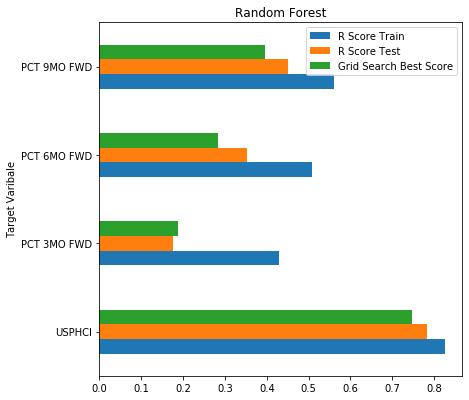

In [49]:
df_rf_summary.plot("Target Varibale",kind='barh',figsize=(6.5,6.5),title="Random Forest")

### Random Forest Regressor with 4 Principle Components

In [50]:
del X_train,X_test,y_train,y_test , rf_model , rf_grid_search

In [51]:
rf_model = RandomForestRegressor(random_state= SEED)
params_rf = {
'n_estimators': [100,200,300,400],
'max_depth': [1,2,3,4,5,6],
'min_samples_leaf': [0.1,.12,.15, 0.2],
'max_features': ['log2','sqrt']}

In [52]:
list_of_r_square_train=[]
list_of_r_square_test=[]
list_of_r_best_param=[]
list_of_grid_sarch_best_score=[]
list_of_svr_best_estimator=[]
for y_variable in traget_variables:
    y=scale(df_Eco[y_variable].values)
    X_train,X_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.25,random_state=seed)
    rf_grid_search=GridSearchCV(estimator=rf_model,
                 param_grid=params_rf,
                                 iid=False,
                                 cv=10,
                                 scoring='r2',
                                 n_jobs=-1,
                                 verbose=1)
    rf_grid_search.fit(X_train, y_train)
    list_of_r_square_train.append(rf_grid_search.score(X_train, y_train))
    list_of_r_square_test.append(rf_grid_search.score(X_test, y_test))
    list_of_grid_sarch_best_score.append(rf_grid_search.best_score_)
    list_of_svr_best_estimator.append(rf_grid_search.best_estimator_)
    list_of_r_best_param.append(rf_grid_search.best_params_)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 869 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 1619 tasks      | elapsed:   55.7s
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 524 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 1024 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 1724 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  1.3min finished


Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 191 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 641 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 1391 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Done 236 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 836 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 1836 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  1.1min finished


In [53]:
df_rf_summary_pca=pd.DataFrame({"Target Varibale":traget_variables,
              "R Score Train":list_of_r_square_train,
             "R Score Test":list_of_r_square_test,
             "Grid Search Best Score":list_of_grid_sarch_best_score,
             "Best Estimator":list_of_svr_best_estimator,
             "Best Parameters":list_of_r_best_param})
df_rf_summary_pca["PCA"]=True
df_rf_summary_pca["Model"]="Random Forest"
df_rf_summary_pca

,Target Varibale,R Score Train,R Score Test,Grid Search Best Score,Best Estimator,Best Parameters,PCA,Model
0,USPHCI,0.7916,0.7427,0.7174,"(DecisionTreeRegressor(criterion='mse', max_de...","{'max_depth': 4, 'max_features': 'log2', 'min_...",True,Random Forest
1,PCT 3MO FWD,0.4043,0.1416,0.1757,"(DecisionTreeRegressor(criterion='mse', max_de...","{'max_depth': 3, 'max_features': 'log2', 'min_...",True,Random Forest
2,PCT 6MO FWD,0.4687,0.2997,0.2219,"(DecisionTreeRegressor(criterion='mse', max_de...","{'max_depth': 3, 'max_features': 'log2', 'min_...",True,Random Forest
3,PCT 9MO FWD,0.4849,0.3891,0.2929,"(DecisionTreeRegressor(criterion='mse', max_de...","{'max_depth': 3, 'max_features': 'log2', 'min_...",True,Random Forest


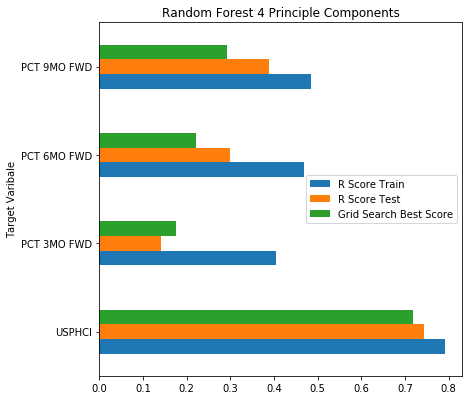

In [54]:
df_rf_summary_pca.plot("Target Varibale",kind='barh',figsize=(6.5,6.5),title="Random Forest 4 Principle Components")

### Gradient Boosting

In [55]:
del X_train,X_test,y_train,y_test 

In [ ]:
gb_model=GradientBoostingRegressor(n_estimators=500, max_depth=1, random_state=SEED)
list_of_r_square_train=[]
list_of_r_square_test=[]
for y_variable in traget_variables:
    y=scale(df_Eco[y_variable].values)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=212)
    gb_model.fit(X_train,y_train)
    list_of_r_square_train.append(gb_model.score(X_train, y_train))
    list_of_r_square_test.append(gb_model.score(X_test, y_test))

In [59]:
df_gb_summary=pd.DataFrame({"Target Varibale":traget_variables,
              "R Score Train":list_of_r_square_train,
             "R Score Test":list_of_r_square_test})
df_gb_summary["PCA"]=False
df_gb_summary["Model"]="Gradient Boosting"
df_gb_summary

,Target Varibale,R Score Train,R Score Test,PCA,Model
0,USPHCI,0.7916,0.7427,False,Gradient Boosting
1,PCT 3MO FWD,0.4043,0.1416,False,Gradient Boosting
2,PCT 6MO FWD,0.4687,0.2997,False,Gradient Boosting
3,PCT 9MO FWD,0.4849,0.3891,False,Gradient Boosting


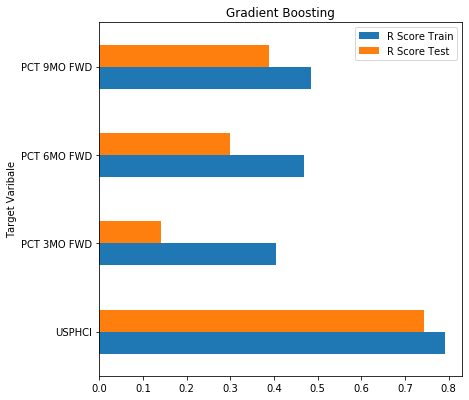

In [61]:
df_gb_summary.plot("Target Varibale",kind='barh',figsize=(6.5,6.5),title="Gradient Boosting")

In [62]:
list_of_res_df=['df_gb_summarry',
 'df_knn_summary',
 'df_knn_summary_pca',
 'df_linear_reg_summarry',
 'df_linear_reg_summary_pca',
 'df_rf_summary',
 'df_rf_summary_pca',
 'df_sgb_summarry',
 'df_svr_summary',
 'df_svr_summary_pca']

In [100]:
df_result=pd.concat([df_gb_summary,
 df_knn_summary,
 df_knn_summary_pca,
 df_linear_reg_summarry,
 df_linear_reg_summary_pca,
 df_rf_summary,
 df_rf_summary_pca,
 df_svr_summary,
 df_svr_summary_pca],sort=False,ignore_index=True).sort_values(["Target Varibale","R Score Test"],ascending=False).reset_index(
drop=True)
df_result['Model_Rank']=df_result.groupby("Target Varibale").cumcount()+1

In [123]:
df_result["Target Model"]=df_result["Target Varibale"]+" "+df_result["Model"]

### Best Modles in terms of R^2 

In [124]:
df_result.query("Model_Rank==1")

,Target Varibale,R Score Train,R Score Test,PCA,Model,Grid Search Best Score,Best Estimator,Best Parameters,Model_Rank,Target Model
0,USPHCI,0.9366,0.8777,False,KNN Regressor,0.8468,"KNeighborsRegressor(algorithm='auto', leaf_siz...","{'n_neighbors': 3, 'p': 2}",1,USPHCI KNN Regressor
9,PCT 9MO FWD,0.6900,0.6978,False,KNN Regressor,0.4228,"KNeighborsRegressor(algorithm='auto', leaf_siz...","{'n_neighbors': 6, 'p': 1}",1,PCT 9MO FWD KNN Regressor
18,PCT 6MO FWD,0.6178,0.6021,False,KNN Regressor,0.2792,"KNeighborsRegressor(algorithm='auto', leaf_siz...","{'n_neighbors': 6, 'p': 1}",1,PCT 6MO FWD KNN Regressor
27,PCT 3MO FWD,0.5703,0.4249,False,SVR,0.3425,"SVR(C=2, cache_size=200, coef0=0.0, degree=1, ...","{'C': 2, 'degree': 1, 'kernel': 'rbf'}",1,PCT 3MO FWD SVR


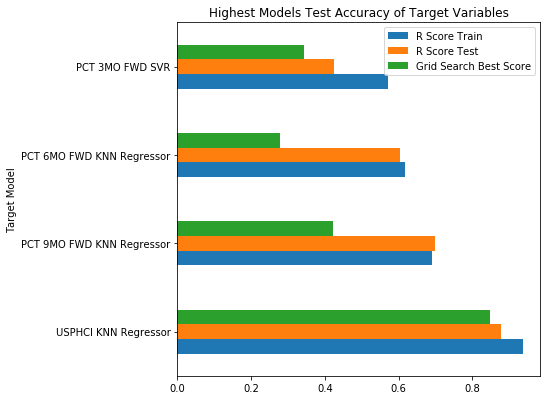

In [132]:
df_result.query("Model_Rank==1").plot(x="Target Model",y=["R Score Train","R Score Test","Grid Search Best Score"],
                                      kind='barh',figsize=(6.5,6.5),title="Highest Models Test Accuracy of Target Variables")